<a href="https://colab.research.google.com/github/Akshaynair47/Enhanced-NWP/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Load .npy file
air_norm = np.load("/content/input_tensor_t0.npy")

# Print basic info
print("Shape:", air_norm.shape)   # (time_steps, lat, lon)
print("Data type:", air_norm.dtype)


Shape: (9, 64, 128)
Data type: float32


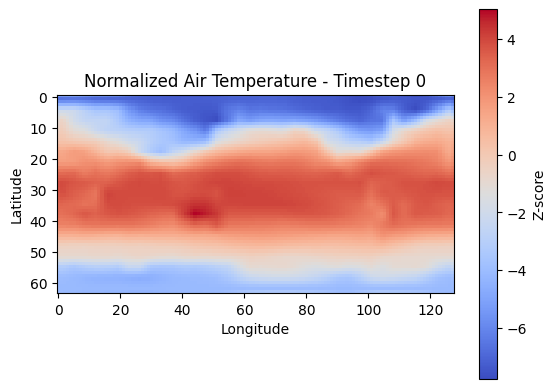

In [2]:
import matplotlib.pyplot as plt

# Show a specific timestep
timestep = 0  # Change to 1, 2, ... to see other days
plt.imshow(air_norm[timestep], cmap="coolwarm")
plt.title(f"Normalized Air Temperature - Timestep {timestep}")
plt.colorbar(label="Z-score")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
air_norm = np.load("/content/input_tensor_t0.npy")

# Define latitude and longitude axes
lat = np.linspace(90, -90, air_norm.shape[1])   # 73 latitudes
lon = np.linspace(0, 357.5, air_norm.shape[2])  # 144 longitudes


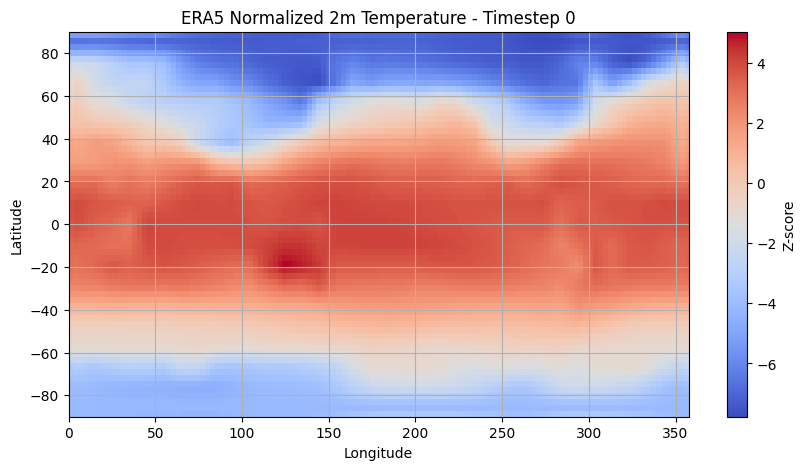

In [4]:
# Choose a timestep to visualize
timestep = 0
data = air_norm[timestep]

plt.figure(figsize=(10, 5))
plt.imshow(data, cmap="coolwarm", extent=[lon[0], lon[-1], lat[-1], lat[0]], aspect='auto')
plt.title(f"ERA5 Normalized 2m Temperature - Timestep {timestep}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Z-score")
plt.grid(True)
plt.show()


In [5]:
!pip install imageio matplotlib --quiet


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio  # use v2 for backward compatibility
import os

# Load the data
air_norm = np.load("air_norm.npy")
lat = np.linspace(90, -90, air_norm.shape[1])
lon = np.linspace(0, 357.5, air_norm.shape[2])

# Create output folder
os.makedirs("frames", exist_ok=True)

# Save each frame as PNG
for i in range(30):  # change to more days if you like
    plt.figure(figsize=(8, 4))
    plt.imshow(air_norm[i], cmap="coolwarm", extent=[lon[0], lon[-1], lat[-1], lat[0]], aspect='auto')
    plt.title(f"Timestep {i}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.colorbar(label="Z-score")
    plt.tight_layout()
    plt.savefig(f"frames/frame_{i:03d}.png")
    plt.close()

print("✅ Saved 30 frames.")


✅ Saved 30 frames.


In [7]:
# Collect frame paths
frame_paths = [f"frames/frame_{i:03d}.png" for i in range(30)]

# Create GIF
with imageio.get_writer("air_temp_animation.gif", mode='I', duration=0.4) as writer:
    for path in frame_paths:
        image = imageio.imread(path)
        writer.append_data(image)

print("✅ GIF saved as air_temp_animation.gif")


✅ GIF saved as air_temp_animation.gif


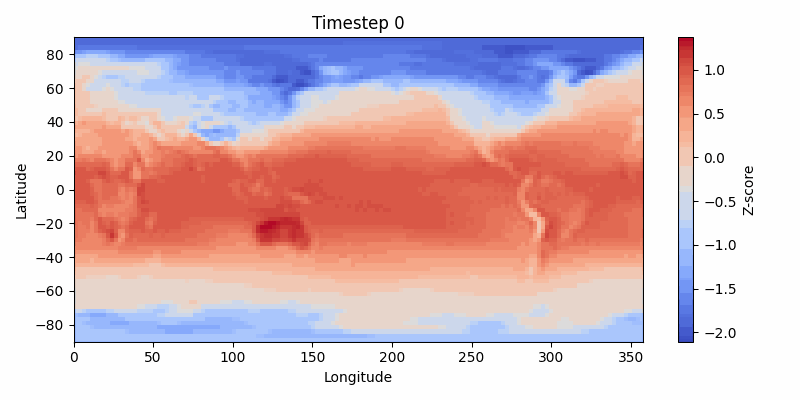

In [13]:
from IPython.display import Image
Image(filename="air_temp_animation.gif")


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os

# Load ERA5-style tensor
air_norm = np.load("air_norm.npy")
lat_grid = np.linspace(90, -90, air_norm.shape[1])
lon_grid = np.linspace(0, 357.5, air_norm.shape[2])

# City coordinates
cities = {
    "Bengaluru": (12.97, 77.59),
    "Mumbai": (19.07, 72.87),
    "Kolkata": (22.57, 88.36),
    "Delhi": (28.61, 77.21),
    "Chennai": (13.08, 80.27)
}

# Map real lat/lon to grid index
def find_index(coord, grid):
    return np.abs(grid - coord).argmin()

# Create GIF for each city
os.makedirs("city_gifs", exist_ok=True)

for city, (lat_c, lon_c) in cities.items():
    lat_idx = find_index(lat_c, lat_grid)
    lon_idx = find_index(lon_c, lon_grid)

    # ±5 grid points ≈ ±12.5° (ERA5 is 2.5° resolution)
    lat_start, lat_end = lat_idx - 2, lat_idx + 3
    lon_start, lon_end = lon_idx - 2, lon_idx + 3

    lat_slice = slice(max(0, lat_start), min(len(lat_grid), lat_end))
    lon_slice = slice(max(0, lon_start), min(len(lon_grid), lon_end))

    # Create folder for frames
    frame_folder = f"city_gifs/frames_{city}"
    os.makedirs(frame_folder, exist_ok=True)

    # Generate frames
    for t in range(30):  # Adjust number of frames if needed
        cropped = air_norm[t][lat_slice, lon_slice]
        extent = [
            lon_grid[lon_slice.start], lon_grid[lon_slice.stop - 1],
            lat_grid[lat_slice.stop - 1], lat_grid[lat_slice.start]
        ]

        plt.figure(figsize=(5, 4))
        plt.imshow(cropped, cmap='coolwarm', extent=extent, aspect='auto')
        plt.title(f"{city} | Day {t}")
        plt.colorbar(label="Z-score")
        plt.tight_layout()
        plt.savefig(f"{frame_folder}/frame_{t:03d}.png")
        plt.close()

    # Compile GIF
    gif_path = f"city_gifs/{city}_temp.gif"
    with imageio.get_writer(gif_path, mode='I', duration=0.5) as writer:
        for t in range(30):
            img = imageio.imread(f"{frame_folder}/frame_{t:03d}.png")
            writer.append_data(img)

    print(f"✅ Saved {city} GIF to {gif_path}")


✅ Saved Bengaluru GIF to city_gifs/Bengaluru_temp.gif
✅ Saved Mumbai GIF to city_gifs/Mumbai_temp.gif
✅ Saved Kolkata GIF to city_gifs/Kolkata_temp.gif
✅ Saved Delhi GIF to city_gifs/Delhi_temp.gif
✅ Saved Chennai GIF to city_gifs/Chennai_temp.gif


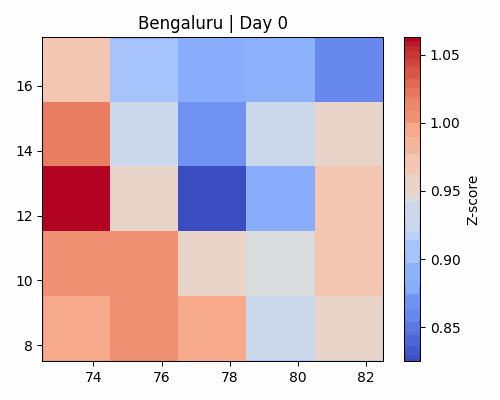

In [14]:
from IPython.display import Image
Image(filename="city_gifs/Bengaluru_temp.gif")
